---
layout: default
title: "Deep Learning - CNN - YOLO"
categories: deeplearning
permalink: /ML38/
order: 38
comments: true
---

In [1]:
%pylab --no-import-all inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from plot_ann import ann
plt.rcParams["mathtext.fontset"] = "cm"
import pandas as pd
import sklearn.datasets
from matplotlib import cm
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.patches import Rectangle

Populating the interactive namespace from numpy and matplotlib


# YOLO
While the convolutional implementation of the sliding window is more computationally efficient that running a CNN independently for each step of a classic sliding window approach, it has the problem of outputting inaccurate bounding boxes. Suppose our convolutional localization algorithm takes as input a series of windows but none of them really matches ground truth (A) and maybe the best one (B) is as the one in <a href="#fig:bboxes">the figure below</a>. 

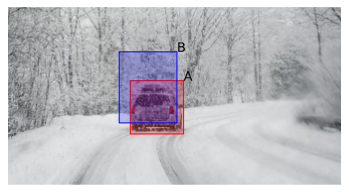

In [2]:
fig, ax = plt.subplots()
img = plt.imread('./data/img/car.jpg')
ax.imshow(img)
yrect = Rectangle((275, 165), 120, 120, facecolor=(1, 0, 0, 0.2), edgecolor='r')
prect = Rectangle((250, 100), 130, 160, facecolor=(0, 0, 1, 0.2), edgecolor='b')
ax.add_artist(yrect)
ax.add_artist(prect)
ax.text(1, 0, 'A', transform=yrect.get_transform(), fontsize=13)
ax.text(1, 0, 'B', transform=prect.get_transform(), fontsize=13)
ax.set_axis_off()

<i id="fig:bboxes">Labelled (A) and predicted (B) bounding boxes localizing a car in a picture</i>

The [**YOLO**](https://arxiv.org/abs/1506.02640) algorithm allows to increase the accuracy of predicted bounding boxes. The YOLO (**You Only Look Once**) algorithm functions by applying a grid to the input image. In <a href="#fig:yologrid">the figure below</a> we divide the input image in a $4 \times 4$ grid although in an actual implementation a finer grid is usually employed as for example a $19 \times 19$ grid. The basic idea of the YOLO algorithm is to apply the image classification and localization algorithm seen before and apply it to each cell in the grid.

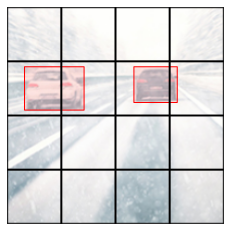

In [52]:
fig, ax = plt.subplots()
img = plt.imread('./data/img/cars.jpg')
img = img[:, 120:-106, :]
img.shape
ax.imshow(img)
r1 = Rectangle((16, 55), 55, 40, facecolor=(1, 0, 0, 0.1), edgecolor='r')
r2 = Rectangle((117, 55), 40, 33, facecolor=(1, 0, 0, 0.1), edgecolor='r')
ax.add_artist(r1)
ax.add_artist(r2)
for coord in np.arange(0, 250, 50):
    ax.axvline(coord, c='k', lw=2)
    ax.axhline(coord, c='k', lw=2)
ax.set_xlim(0, 200)
ax.set_ylim(200, 0)

ax.set_axis_off()

<i id="fig:yologrid">yolo</i>

## Intersection over union
Intersection over union can be used to evaluate an object detection algorithm and it is also instrumental to **nonmax suppression**. Suppose you have dataset of pictures labelled with the location of some objects (e.g. cars). Suppose that you develop a CNN that localizes cars trained on that dataset and once run, you have a ground truth bounding box (A) and a predicted bounding box (B) as in <a href="#fig:bboxes">the figure below</a>. How do you compare a predicted bounding box (B) against the ground truth (A)?

To evaluate bounding boxes we use an index called **intersection over union**, which is a measure of the overlap between two bounding boxes:

$$
\text{IoU} = \frac{A \cap B}{A \cup B} 
$$

By convention many localization tasks will evaluate an answer as correct if $\text{IoU} \geq 0.5$.